In [394]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

credit_df=pd.read_csv(r"C:\Users\Hero\Downloads\credit score.csv")
credit_df.shape

C:\Users\Hero\AppData\Local\Temp\ipykernel_16240\2329299374.py:6: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  credit_df=pd.read_csv(r"C:\Users\Hero\Downloads\credit score.csv")


(100000, 28)

In [395]:
pd.set_option('display.max_columns', None)
credit_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [396]:
credit_df["Credit_Mix"].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [397]:
credit_df["Credit_Mix"]=credit_df["Credit_Mix"].map({"Good":0,"Standard":1,"Bad":2,"_":3})

In [398]:
credit_df["Credit_Score"].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [399]:
credit_df["Credit_Score"]=credit_df["Credit_Score"].map({"Good":0,"Standard":1,"Poor":2})

In [400]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [401]:
credit_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [402]:
#There is no use of columns like id, customer_ID,SSN
credit_df.drop(columns=["ID","Customer_ID","SSN","Changed_Credit_Limit","Num_Credit_Inquiries","Occupation",],axis=1,inplace=True)

In [403]:
credit_df.isnull().sum()

Month                           0
Name                         9985
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

<AxesSubplot:>

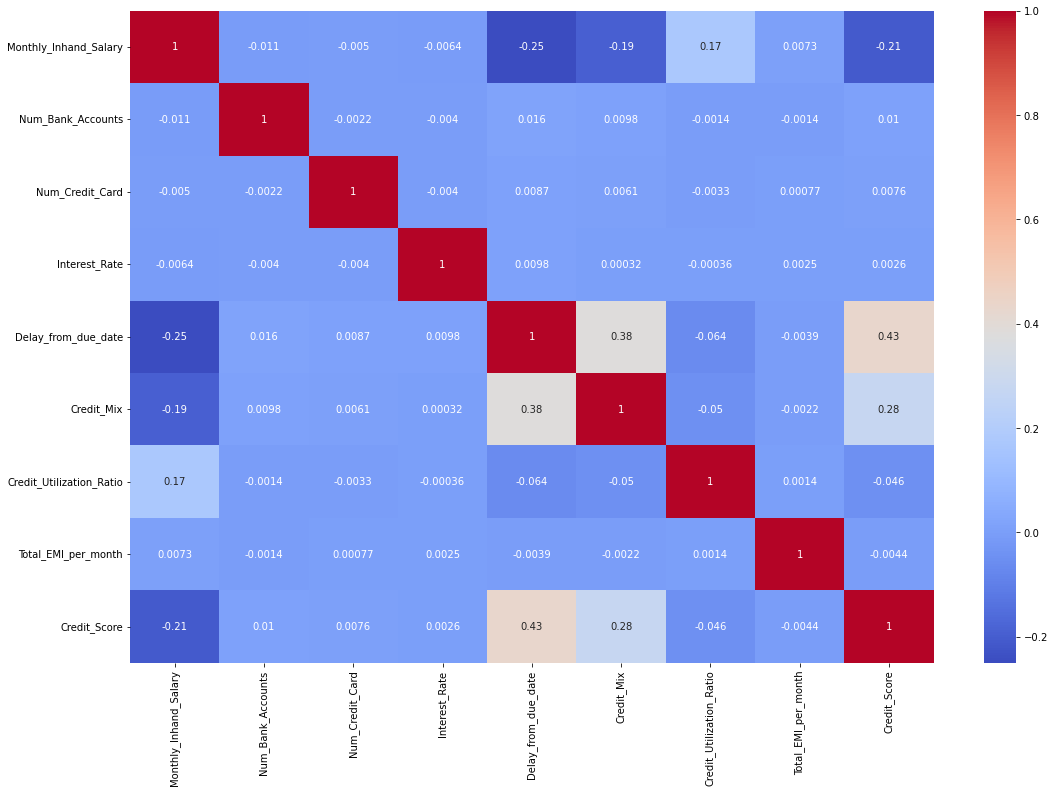

In [404]:
plt.figure(figsize=(18,12))
sns.heatmap(credit_df.corr(),annot=True,cmap="coolwarm")


In [405]:
credit_df.drop(columns=["Name"],axis=1,inplace=True)

In [406]:
credit_df.shape

(100000, 21)

In [407]:
df=credit_df

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Credit_Mix                100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [409]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Credit_Mix,100000.0,1.350420,1.057486,0.000000,1.000000,1.000000,2.000000,3.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000
Credit_Score,100000.0,1.111700,0.675120,0.000000,1.000000,1.000000,2.000000,2.000000


In [410]:
df["Monthly_Inhand_Salary"].fillna(df["Monthly_Inhand_Salary"].median(),inplace=True)

In [411]:
# I have seen age it is ob object type and many outliers are present in it like -1000 , -500 etc. how it can be the age of any person.
#Some underscore numbers are also there so to remove them:
#def convert_to_int(string):
 #   string_without_underscore=string.rstrip("_")
  #  return int(string_without_underscore)
#df['Age'] = df['Age'].apply(convert_to_int)
#df["Age"]=df["Age"].astype(int)

df["Age"]=df["Age"].str.replace("_","")


In [412]:
df["Age"]=df["Age"].astype('int64')

In [414]:
df[["Age","Credit_Score"]].corr()

,Age,Credit_Score
Age,1.000000,-0.004292
Credit_Score,-0.004292,1.000000


In [415]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,110.649700,686.244717,-500.000000,24.000000,33.000000,42.000000,8698.000000
Monthly_Inhand_Salary,100000.0,4029.084964,2961.363540,303.645417,1792.084167,3093.745000,5371.525000,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Credit_Mix,100000.0,1.350420,1.057486,0.000000,1.000000,1.000000,2.000000,3.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000
Credit_Score,100000.0,1.111700,0.675120,0.000000,1.000000,1.000000,2.000000,2.000000


In [417]:
df["Age"].isnull().sum()

0

In [418]:
df["Age"].dtype

dtype('int64')

In [426]:
df.loc[df["Age"]>112,"Age"]=pd.NA
df.loc[df["Age"]<=0,"Age"]=pd.NA

In [427]:
df["Age"].isnull().sum()

2772

In [428]:
median_age = df['Age'].median()
df['Age'] = df['Age'].fillna(median_age)

In [430]:
df.describe().T
#Age corrected...

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.317320,10.639037,14.000000,25.000000,33.000000,41.000000,112.000000
Monthly_Inhand_Salary,100000.0,4029.084964,2961.363540,303.645417,1792.084167,3093.745000,5371.525000,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Credit_Mix,100000.0,1.350420,1.057486,0.000000,1.000000,1.000000,2.000000,3.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000
Credit_Score,100000.0,1.111700,0.675120,0.000000,1.000000,1.000000,2.000000,2.000000


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              88592 non-null   object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Credit_Mix                100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [432]:
#We see that Annual income also have underscores. so
#def convert_to_float(string):
 #   string_without_underscore=string.rstrip("_")
  #  return float(string_without_underscore)
df['Annual_Income'] = df['Annual_Income'].str.replace("_","")
df["Annual_Income"]=df["Annual_Income"].astype(float)

In [433]:
df.isnull().sum()

Month                           0
Age                             0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [434]:
df["Type_of_Loan"][df["Type_of_Loan"].isnull()]="Not Specified"

C:\Users\Hero\AppData\Local\Temp\ipykernel_16240\4282496075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type_of_Loan"][df["Type_of_Loan"].isnull()]="Not Specified"


In [435]:
df["Type_of_Loan"].isnull().sum()

0

In [436]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].str.replace("_","")

In [437]:
#as i saw that in num of delayed payments there are many null values and also underscore values objects so i first tried to see the mean of non null delayed payments values.
df_nonnull_delayed_payments=df[~(df["Num_of_Delayed_Payment"].isnull())]
#df_nonnull_delayed_payments["Num_of_Delayed_Payment"].astype(float)
df_nonnull_delayed_payments['Num_of_Delayed_Payment'] = df_nonnull_delayed_payments['Num_of_Delayed_Payment'].astype("int64")
#df_nonnull_delayed_payments["Num_of_Delayed_Payment"]=df_nonnull_delayed_payments["Num_of_Delayed_Payment"].astype(int)
#df_nonnull_delayed_payments.isnull().sum()

C:\Users\Hero\AppData\Local\Temp\ipykernel_16240\946958204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonnull_delayed_payments['Num_of_Delayed_Payment'] = df_nonnull_delayed_payments['Num_of_Delayed_Payment'].astype("int64")


In [438]:
df_nonnull_delayed_payments.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,92998.0,33.293867,1.063235e+01,14.000000,25.000000,33.000000,41.000000,1.090000e+02
Annual_Income,92998.0,175444.811056,1.426534e+06,7005.930000,19480.040000,37607.280000,72816.480000,2.419806e+07
Monthly_Inhand_Salary,92998.0,4030.207641,2.962193e+03,303.645417,1792.315000,3093.745000,5373.571667,1.520463e+04
Num_Bank_Accounts,92998.0,17.061948,1.173385e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,92998.0,22.473118,1.291051e+02,0.000000,4.000000,6.000000,7.000000,1.499000e+03
Interest_Rate,92998.0,73.151767,4.696687e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Delay_from_due_date,92998.0,21.064679,1.485643e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,92998.0,30.923342,2.260319e+02,-3.000000,9.000000,14.000000,18.000000,4.397000e+03
Credit_Mix,92998.0,1.350814,1.057645e+00,0.000000,1.000000,1.000000,2.000000,3.000000e+00
Credit_Utilization_Ratio,92998.0,32.295837,5.116420e+00,20.000000,28.068455,32.321080,36.504064,5.000000e+01


In [439]:
df['Num_of_Delayed_Payment']=df["Num_of_Delayed_Payment"].fillna(df_nonnull_delayed_payments["Num_of_Delayed_Payment"].mean())

In [440]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     100000 non-null  float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Type_of_Loan              100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  object 
 11  Credit_Mix                100000 non-null  int64  
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

In [441]:
df["Num_of_Delayed_Payment"]=df["Num_of_Delayed_Payment"].astype("int64")

In [442]:
df["Num_of_Delayed_Payment"].describe().T

count    100000.000000
mean         30.858690
std         217.974964
min          -3.000000
25%           9.000000
50%          15.000000
75%          19.000000
max        4397.000000
Name: Num_of_Delayed_Payment, dtype: float64

In [443]:
#Changed_Credit_Limit	
#Num_Credit_Inquiries	
#Credit_Mix	Outstanding_Debt	
#Credit_Utilization_Ratio	
#Credit_History_Age	
#Payment_of_Min_Amount	
#Total_EMI_per_month

In [444]:
df["Credit_History_Age"]=df["Credit_History_Age"].fillna("None")

In [445]:
df["Num_of_Loan"]=df["Num_of_Loan"].str.replace("_","")

In [446]:
df["Num_of_Loan"]=df["Num_of_Loan"].astype("int64")

c:\Users\Hero\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_Mix', ylabel='Credit_Score'>

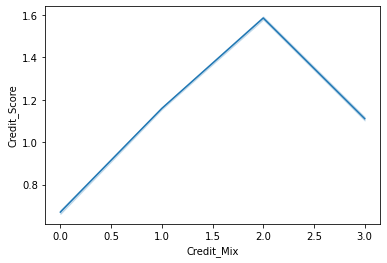

In [447]:
sns.lineplot(df["Credit_Mix"],df["Credit_Score"])

In [448]:
df[["Credit_Mix","Credit_Score"]].corr()

,Credit_Mix,Credit_Score
Credit_Mix,1.000000,0.276147
Credit_Score,0.276147,1.000000


In [449]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].str.replace("_","")

In [450]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].astype(float)

In [451]:
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace("_","")
df["Monthly_Balance"]=df["Monthly_Balance"].str.replace("-","")

In [452]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.317320,1.063904e+01,14.000000,25.000000,33.000000,41.000000,1.120000e+02
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4029.084964,2.961364e+03,303.645417,1792.084167,3093.745000,5371.525000,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,3.009960,6.264788e+01,-100.000000,1.000000,3.000000,5.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,30.858690,2.179750e+02,-3.000000,9.000000,15.000000,19.000000,4.397000e+03
Credit_Mix,100000.0,1.350420,1.057486e+00,0.000000,1.000000,1.000000,2.000000,3.000000e+00


In [453]:
df["Monthly_Balance"].isnull().sum()

2868

In [454]:
df["Monthly_Balance"]=df["Monthly_Balance"].astype(float)

In [455]:
df["Amount_invested_monthly"]=df["Amount_invested_monthly"].fillna(df["Amount_invested_monthly"].median())

In [456]:
df.isnull().sum()

Month                          0
Age                            0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance             2868
Credit_Score                   0
dtype: int64

<AxesSubplot:>

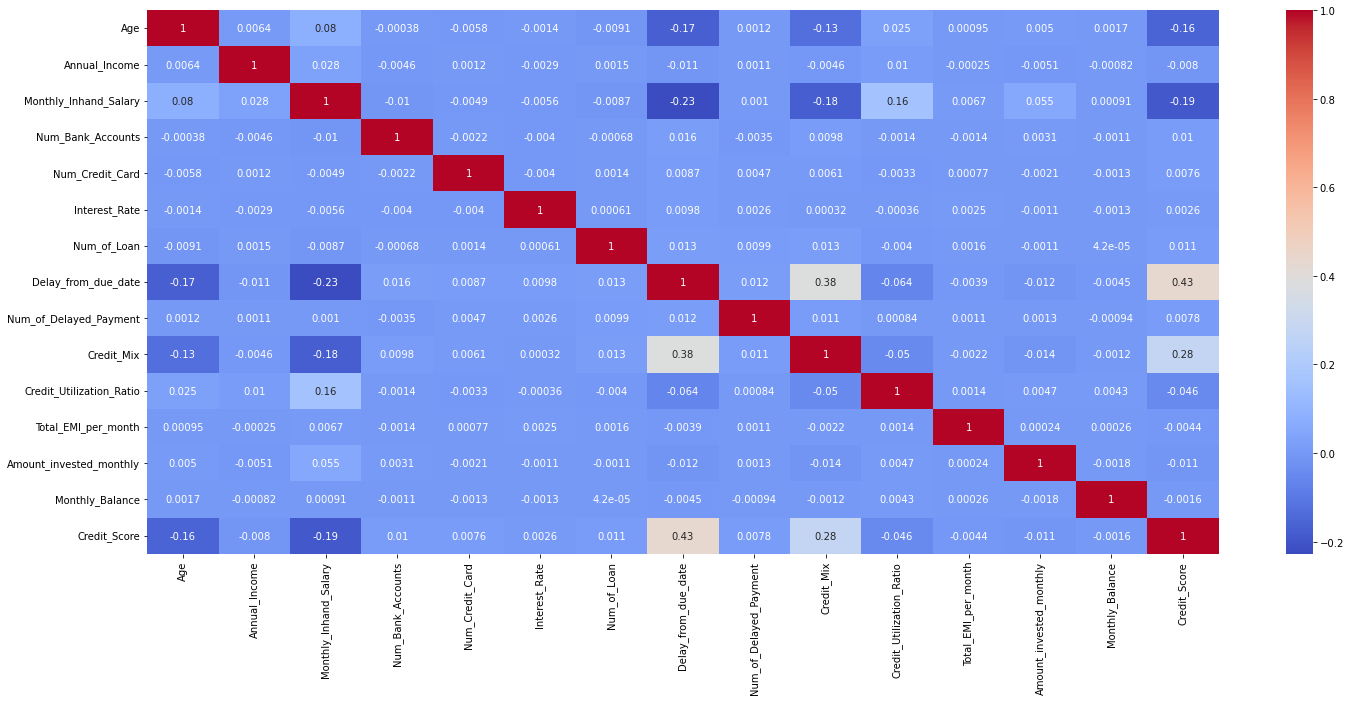

In [457]:
plt.figure(figsize=(24,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [458]:
pd.set_option('display.max_columns', None)
df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,3,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,0
1,February,23.0,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,30,0,809.98,31.944960,None,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,0
2,March,33.0,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,0,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,0
3,April,23.0,19114.12,3093.745000,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,0,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,0
4,May,23.0,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,30,0,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,0


In [459]:
df.drop(columns=["Month"],inplace=True)

In [460]:
#selecting object datatypes so that we can label encode them.
lst_obj=df.select_dtypes(['object']).columns.tolist()
lst_obj


['Type_of_Loan',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [461]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].str.replace("_","")

In [462]:
df["Outstanding_Debt"]=df["Outstanding_Debt"].astype(float)

In [464]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
df["Type_of_Loan"]=Le.fit_transform(df["Type_of_Loan"])
df["Credit_History_Age"]=Le.fit_transform(df["Credit_History_Age"])
df["Payment_of_Min_Amount"]=Le.fit_transform(df["Payment_of_Min_Amount"])
df["Payment_Behaviour"]=Le.fit_transform(df["Payment_Behaviour"])

In [465]:
df.shape

(100000, 20)

In [466]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,3.331732e+01,1.063904e+01,14.000000,25.000000,33.000000,41.000000,1.120000e+02
Annual_Income,100000.0,1.764157e+05,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,100000.0,4.029085e+03,2.961364e+03,303.645417,1792.084167,3093.745000,5371.525000,1.520463e+04
Num_Bank_Accounts,100000.0,1.709128e+01,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,2.247443e+01,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,7.246604e+01,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,3.009960e+00,6.264788e+01,-100.000000,1.000000,3.000000,5.000000,1.496000e+03
Type_of_Loan,100000.0,3.194688e+03,1.714425e+03,0.000000,1777.750000,3463.000000,4553.250000,6.259000e+03
Delay_from_due_date,100000.0,2.106878e+01,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,3.085869e+01,2.179750e+02,-3.000000,9.000000,15.000000,19.000000,4.397000e+03


In [467]:
df["Monthly_Balance"].fillna(df["Monthly_Balance"].median(),inplace=True)

In [468]:
df.drop(columns=["Payment_Behaviour"],inplace=True)

In [469]:
X=df.drop(columns=["Credit_Score"])

In [470]:
y=df["Credit_Score"]

In [472]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [473]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [326]:
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Not getting how many n_components should i take for best results. here from seeing somewhere i have took n_components as 2
#lda = LinearDiscriminantAnalysis(n_components=2)
#X_train = lda.fit_transform(X_train, y_train)
#X_test = lda.transform(X_test) 
#new_df=pd.DataFrame(X_train,columns=["A","B"])
#new_df.head()

In [474]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [475]:
lr.fit(X_train, y_train)

LogisticRegression()

In [476]:
lr_pred = lr.predict(X_test)

In [477]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

# cr = classification_report(lr_pred, y_test)
# print(cr)
accuracy_score(lr_pred, y_test)

0.57225

In [479]:
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

In [480]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [481]:
pred_dt = dt.predict(X_test)

In [482]:
accuracy_score(pred_dt, y_test)

0.70515

In [483]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [484]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [485]:
pred_rf = rf.predict(X_test)

In [486]:
accuracy_score(pred_rf, y_test)

0.7868

In [487]:
#Here i have tried to implement linear discriminat analysis but the accuracy was very low, so i skipped that part and
#manually done feature selection, now i am getting best accuracy with random forest classifier as : 78.77%

In [488]:
df.columns

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [489]:
#Trying to improve the accuracy by filtering the features more.
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Credit_Score']]

# calculate the VIF for each predictor variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# display the results
print(vif)

    VIF Factor                  features
0     0.092540                       Age
1     0.985001             Annual_Income
2     0.350763     Monthly_Inhand_Salary
3     0.979247         Num_Bank_Accounts
4     0.970567           Num_Credit_Card
5     0.976430             Interest_Rate
6     0.997697               Num_of_Loan
7     0.223610              Type_of_Loan
8     0.332213       Delay_from_due_date
9     0.980352    Num_of_Delayed_Payment
10    0.380134                Credit_Mix
11    0.396141          Outstanding_Debt
12    0.024506  Credit_Utilization_Ratio
13    0.240980        Credit_History_Age
14    0.196264     Payment_of_Min_Amount
15    0.972258       Total_EMI_per_month
16    0.913603   Amount_invested_monthly
17    1.000156           Monthly_Balance
18    0.269444              Credit_Score


In [ ]:
#All vif are less than 5 so no need to eliminate or drop any of the feature.